# Simple realization of linear regression using gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Creating data for representation purposes

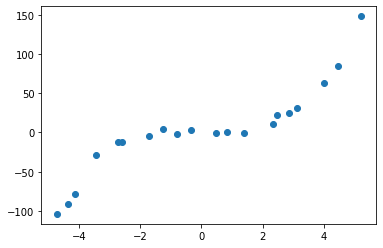

In [4]:
np.random.seed(10)
X = np.linspace(-5, 5, 20)[:, np.newaxis]+ np.random.normal(0, 0.5, (20, 1))
Y = X ** 3  + np.random.normal(0, 5, (20, 1))
plt.scatter(X, Y)

## Simple pipeline class

In [5]:
class PipeLine:
  def __init__(self):
    self.pipeline = [] 
  
  def add(self, func):
    self.pipeline.append(func)
  
  def __call__(self, values_to_tranform):
    for transformation_function in self.pipeline:
      values_to_tranform = transformation_function(values_to_tranform)
    return values_to_tranform
    
def n_degree_polynomial(n, fit_intercept=True): 
  def transfromtaion_function(X):
    if fit_intercept:
      transformed_X = np.ones_like(X)
    else: 
      transformed_X = X
    for power in range(1, n+1):
      if not fit_intercept and power == 1:
        continue
      transformed_X = np.hstack([transformed_X, X ** power])
    return transformed_X
  return transfromtaion_function

def scale_data(X):
  return X / np.max(X, axis=0)

def normalize_data(X):
  std = np.std(X)
  mean = np.mean(X)
  return (X - mean) / std


In [49]:
class LinearRegression:
  def __init__(self, X, Y, pipeline, lr):
    if (lr < 0):
      raise Exception()
    self.X = X
    self.Y = Y
    self.pipeline = pipeline
    self.lr = lr
    self.m = X.shape[0]
    self.transformed_X = pipeline(X)
    self.parameters = np.random.rand(pipeline(X).shape[1])[:, np.newaxis]

  def learn_and_plot_error(self, iterations, lr=None, axis=None):
    if lr is None:
      lr = self.lr
    if axis is None:
      axis = plt.gca()
    errors_arr = np.zeros(iterations)
    self.change_lr(lr)
    for iteration in range(iterations):
      self.update_parameters()
      errors_arr[iteration] = self.error()

    axis.plot(range(1, iterations+1),errors_arr)
    axis.set_xlabel('№ of iteration')
    axis.set_ylabel('Error')

  def update_parameters(self):
      transformed_X = self.pipeline(self.X)
      self.parameters -= self.lr * self.get_partial_derivatives()

  def get_partial_derivatives(self):
    return 1/self.m * \
           np.sum((self.predict_with_transformation(self.X) - self.Y) * self.transformed_X, axis=0)[:, np.newaxis]
    
  def predict_with_transformation(self, X):
    transfotmed_X = self.pipeline(X)
    return self.predict(transfotmed_X)
  
  def predict(self, X):
    return np.matmul(X, self.parameters)

  def plot(self, x_start, x_end, axis=None):
    if axis is None:
      axis = plt.gca()
    X = np.linspace(x_start, x_end, 100)[:, np.newaxis]
    Y = self.predict_with_transformation(X)
    axis.scatter(self.X, self.Y)
    axis.plot(X, Y)
    axis.set_xlim(x_start, x_end)

  def error(self):
    return 1/(2 * self.m) * np.sum((self.predict_with_transformation(self.X) - Y)**2)

  def change_lr(self, new_lr):
    if (new_lr <= 0 ):
      raise Exception('lr must be positive number')
    self.lr = new_lr
  
  def __str__(self):
    linear_regression_info = \
    f'''
    parameters: {self.parameters}
    partial_derivatives: {self.get_partial_derivatives()}
    error: {self.error()}
    learning rate: {self.lr}
    '''

    return linear_regression_info

<Figure size 800x600 with 0 Axes>

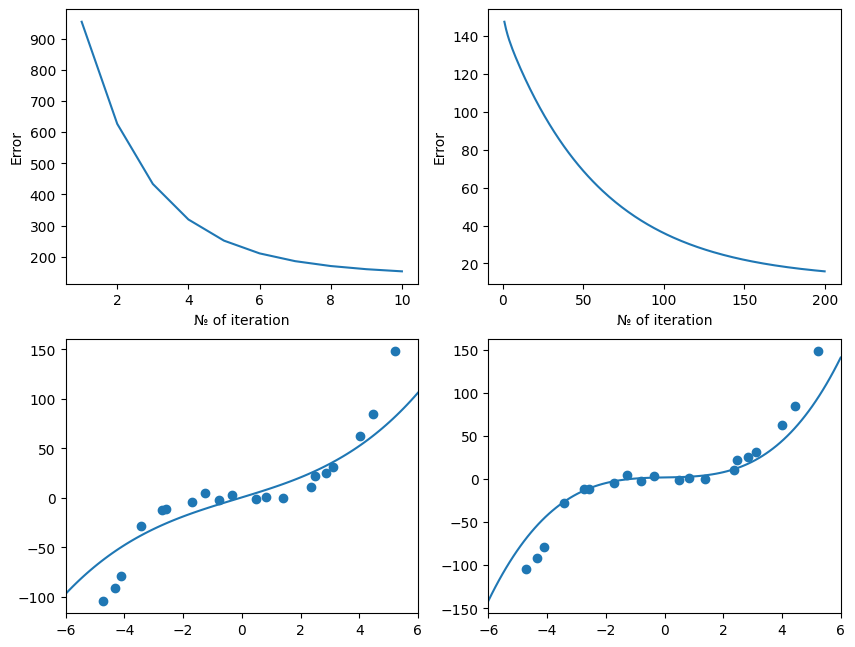

In [62]:
plt.figure(dpi = 100, figsize=(8, 6))
normalize_pipeline = PipeLine()
normalize_pipeline.add(n_degree_polynomial(3))
normalize_pipeline.add(scale_data)
l = LinearRegression(X, Y, normalize_pipeline , 0.5)
figure, axes = plt.subplots(2, 2, dpi=100, figsize=(10,8))

l.learn_and_plot_error(10, axis=axes[0, 0])
l.plot(-6, 6, axis=axes[1, 0])
l.learn_and_plot_error(200, axis=axes[0, 1])
l.plot(-6, 6, axis=axes[1, 1])

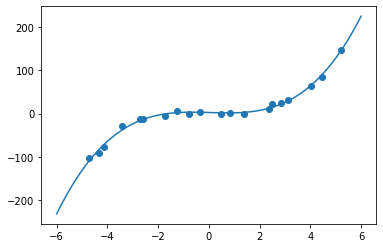

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(X, Y)
xfit = np.linspace(-6, 6, 100)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(xfit, yfit);



